<a href="https://colab.research.google.com/github/Nithinps021/DeepLearning/blob/master/number_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# loading mnist data
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist.data,mnist.target

(-0.5, 27.5, 27.5, -0.5)

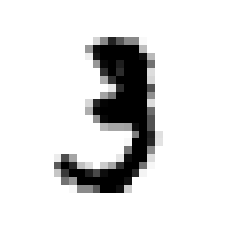

In [25]:
# visualizing data
rand=x[10].reshape(28,28)
val=y[3]
import matplotlib 
import matplotlib.pyplot as plt
def prec_recall_threshold_curve(precision,recalls,thresholds):
  plt.plot(thresholds,precision[:-1],'b--',label='precesion')
  plt.plot(thresholds,recalls[:-1],'r-',label='recall')
  plt.xlabel('Threshold')
  plt.legend(loc="lower left")
  plt.ylim([0,1])

plt.imshow(rand,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
# plt.show()
# print(val)

In [8]:
# separting test data and train data
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit;

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(x,y):
  x_train=x[train_index]
  y_train=y[train_index]
  x_test=x[test_index]
  y_test=y[test_index]
y_train=y_train.astype(np.int)
y_test=y_test.astype(np.int)

In [9]:
# Binary classification (5 and not 5)
# SGDclassifier
y_train_5=(y_train==5)
y_test_5=(y_test==5)

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_val_predict
sgdc=SGDClassifier()

y_train_pred=cross_val_predict(sgdc,x_train,y_train_5,cv=3)

confusion_matrix(y_train_5,y_train_pred)
precision=precision_score(y_train_5,y_train_pred)
recall=recall_score(y_train_5,y_train_pred)
print(precision)
print(recall)

In [ ]:
# decision function
from sklearn.metrics import precision_recall_curve
y_scores=cross_val_predict(sgdc,x_train,y_train_5,cv=3,method='decision_function')

prec,recall,threshold=precision_recall_curve(y_train_5,y_scores)



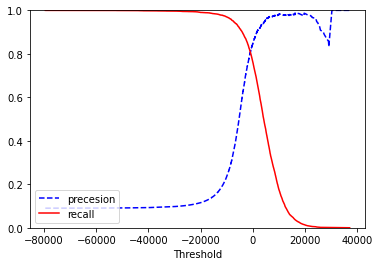

In [26]:
threshold
prec_recall_threshold_curve(prec,recall,threshold)
plt.show()

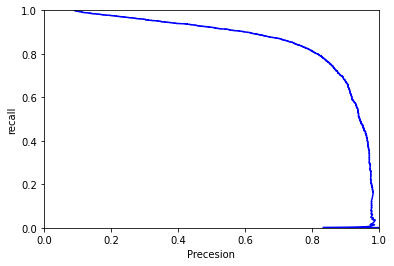

In [27]:
plt.plot(prec,recall,'b-')
plt.xlabel('Precesion')
plt.ylabel('recall')
plt.ylim([0,1])
plt.xlim([0,1])
plt.show()
